In [2]:


!apt-get install tesseract-ocr
!pip install pytesseract opencv-python

import cv2
import imutils   # to resize our images
import pytesseract


# 导入 pytesseract

  # import winsound  # Produce sound




Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 7s (659 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123629 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-en

Saving 009.jpg to 009.jpg


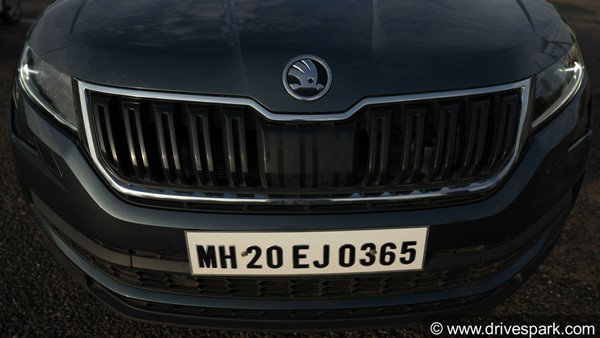

In [3]:
from google.colab import files
from google.colab.patches import cv2_imshow


# 上传图像文件
uploaded = files.upload()

for filename in uploaded.keys():
    image = cv2.imread(filename)  # 读取上传的图像
    if image is None:
        print(f"Failed to load image {filename}")
    else:
        cv2_imshow(image)  # 显示图像
        cv2.imwrite('CarPictures/car.jpg', image)  # 保存图像

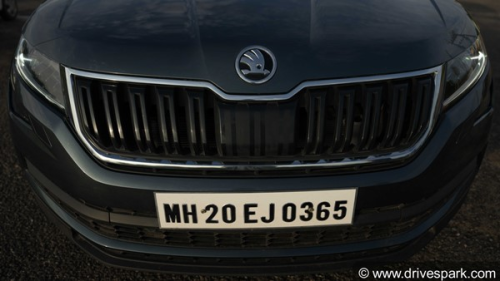

In [4]:

#we will resize and standardise our image to 500
image=imutils.resize(image,width=500)
#we will display original image when it will start finding
cv2_imshow(image) # here original image is the name of window can give your suitable name
#cv2.waitKey(0)

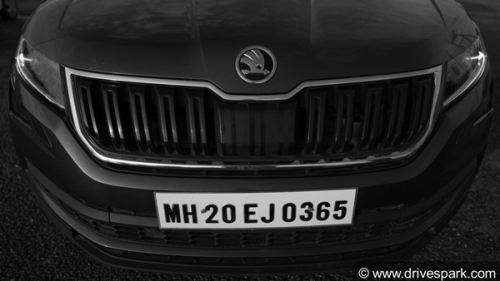

In [5]:
#now we will convert image to gray scale
#why we do is because it will reduce the dimension , also reduces complexity of image
#and yeah there are few algorithms like canny , etc which only works on grayscale images
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
#cv2.waitKey(0)

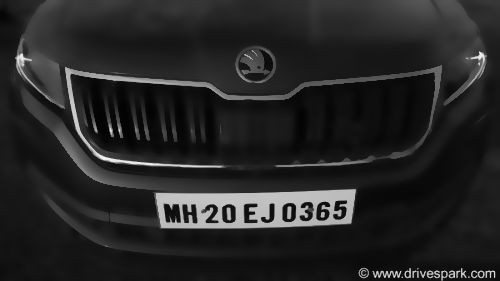

In [7]:
#now we will reduce noise from our image and make it smooth
gray=cv2.bilateralFilter(gray,11,17,17)
cv2_imshow(gray)
#cv2.waitKey(0)

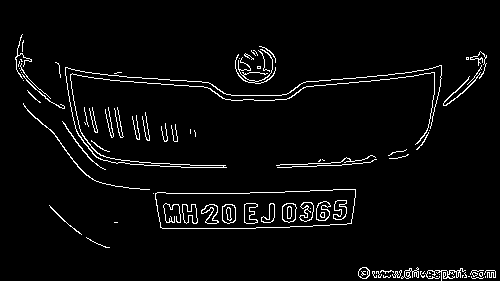

In [8]:
#now we will find the edges of images
edged=cv2.Canny(gray,170,200)
cv2_imshow(edged)
#cv2.waitKey(0)

In [9]:
#now we will find the contours based on the images.
cnts,new=cv2.findContours(edged.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
#so here cnts is contours which means that it is like the curve joining all the contiour points
#new is heirarchy-relationship
#RETR_LIST - it retrives all the contours but doesn't create any parent-child relationship
#CHAIN_APPROX_SIMPLE - it removes all the redundant points and compress the contour by saving memory

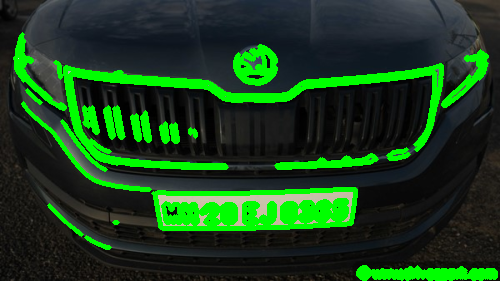

In [10]:
#we will create a copy of our original image to draw all the contours
image1=image.copy()
cv2.drawContours(image1,cnts,-1,(0,255,0),3)
cv2_imshow(image1)
#cv2.waitKey(0)

In [92]:
#now we don't want all the contours we are intrested only in number plate
#but can't directly locate that so we will sort them on the basic of their areas
#we will select those area which are maximum so we will select top 30 areas
#but it will give sorted list as in order of min to maximum
#so for that we will reverse the order of sorting

In [11]:
cnts=sorted(cnts,key=cv2.contourArea,reverse=True)[:30]
NumberPlateCount=None

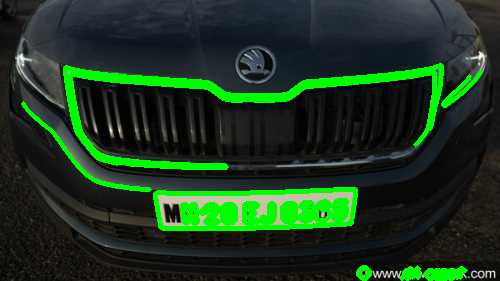

In [12]:
#to drow top 30 contours we will make copy of original image and use
image2=image.copy()
cv2.drawContours(image2,cnts,-1,(0,255,0),3)
cv2_imshow(image2)
#cv2.waitKey(0)

In [13]:
#now we will run a for loop on our contours to find the best possible contour of our expectes number plate
count=0
name=1  #name of our cropped image

In [14]:
for i in cnts:
    perimeter=cv2.arcLength(i,True)
    #perimeter is also called as arcLength and we can find directly in python using arcLength function
    approx=cv2.approxPolyDP(i,0.02*perimeter,True)
    #approxPolyDP we have used because it approximates the curve of polygon with the precision
    if(len(approx)==4):  # 4 means it has 4 corner which well be most probably our number plate as it also has 4 corners
        NumberPlateCount=approx
        #now we will crop that rectangle part
        x , y , w , h =cv2.boundingRect(i)
        crp_img=image[y:y+h,x:x+w]
        cv2.imwrite(str(name)+'.png',crp_img)
        name+=1

        break

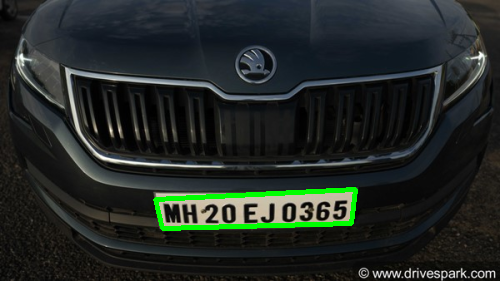

In [15]:
#now we will draw contour in our main image that we have identified as a number plate
cv2.drawContours(image,[NumberPlateCount],-1,(0,255,0),3)
cv2_imshow(image)
#cv2.waitKey(0)

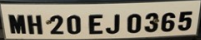

True

In [16]:
#we will crop only the part of number plate
crop_img_loc='1.png'
cv2_imshow(cv2.imread(crop_img_loc))
abc = cv2.imread(crop_img_loc)
save_path = 'saved_image.png'  # 你可以更改为想要的文件名
cv2.imwrite(save_path, abc)
#cv2.waitKey(0)


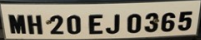

In [17]:
cv2_imshow(abc)

Extracted Text:  WH 20 EJ 0365)

Filtered Text:  WH20EJ0365


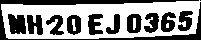

In [18]:
# 转换为灰度图像
gray1 = cv2.cvtColor(abc, cv2.COLOR_BGR2GRAY)

# 可选：进行二值化处理以提高识别率
_, thresh = cv2.threshold(gray1, 150, 255, cv2.THRESH_BINARY)

# 使用 pytesseract 提取文本
text = pytesseract.image_to_string(thresh, lang='eng')

# 打印提取的文本
print("Extracted Text: ", text)

# 过滤文本，只保留字母和数字（可选）
filtered_text = ''.join(e for e in text if e.isalnum())
print("Filtered Text: ", filtered_text)

# 显示处理后的图像（可选）
cv2_imshow(thresh)